In [54]:
from proj_1_module import *
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import math
from scipy.integrate import solve_ivp
plt.style.use([ 'notebook'])

$$\mu = \frac{m_s * m_e}{m_s + m_e}$$
$$\frac{dH}{dp} = \frac{p}{\mu}$$
$$\frac{dH}{dq} = \frac{G(m_s+m_e)\mu}{r^3} r$$

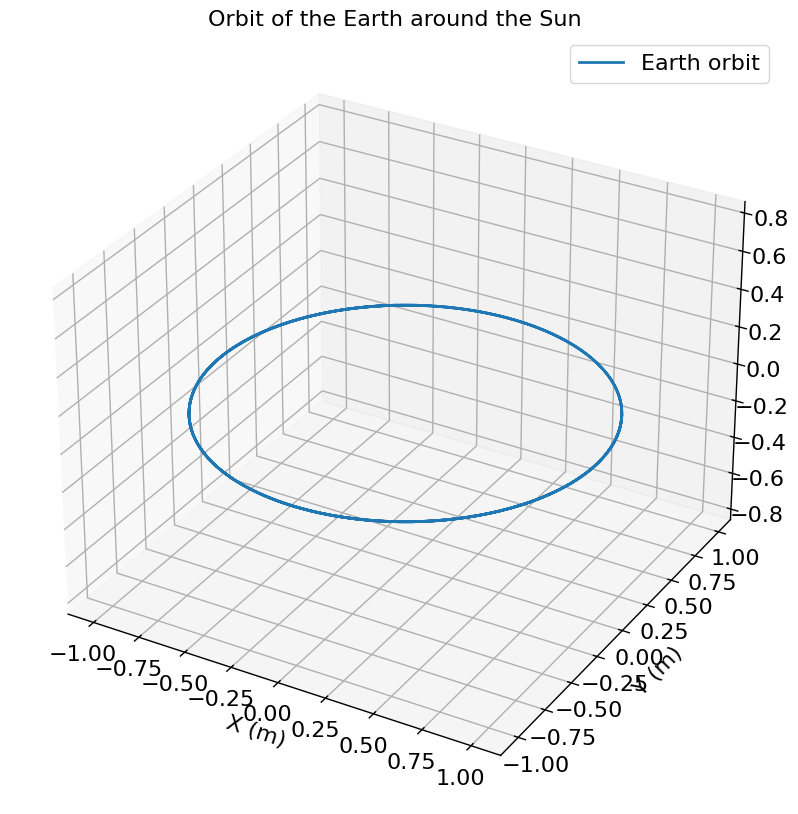

In [55]:
def gravitational_system(t, y, G, M):
    # Unpack position and velocity
    x, y, z, vx, vy, vz = y
    r = np.sqrt(x**2 + y**2 + z**2)
    
    # Compute the acceleration due to gravity
    ax = -G * M * x / r**3
    ay = -G * M * y / r**3
    az = -G * M * z / r**3
    
    return [vx, vy, vz, ax, ay, az]

def solve_orbit(x0, v0, G, M, T, dt):
    # Initial conditions: position and velocity
    initial_conditions = x0 + v0
    
    # Time array from 0 to T with time step dt
    t_eval = np.arange(0, T, dt)
    
    # Solve the ODE system
    sol = solve_ivp(gravitational_system, [0, T], initial_conditions, args=(G, M), t_eval=t_eval, rtol=1e-9, atol=1e-9)
    
    return t_eval, sol.y

# Constants
G = 2.959159*10**(-4)  # m^3 kg^-1 s^-2
M = 1    # kg (Mass of the Sun)
x0 = [-5.34743068e-01 , 8.26293951e-01, -3.61541763e-05]  # m (initial position)
v0 = [-1.47187017e-02 ,-9.41540742e-03 ,-8.67603060e-08]   # m/s (initial velocity)
T = 1000  # s (one year)
dt = 1  # s (time step)

# Solve the system
t, solution = solve_orbit(x0, v0, G, M, T, dt)


# Plot the orbit
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')
ax.plot(solution[0, :], solution[1, :], solution[2,:],label='Earth orbit')
# plt.scatter([0], [0], color='yellow', label='Sun')  # Position of the Sun
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Orbit of the Earth around the Sun')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


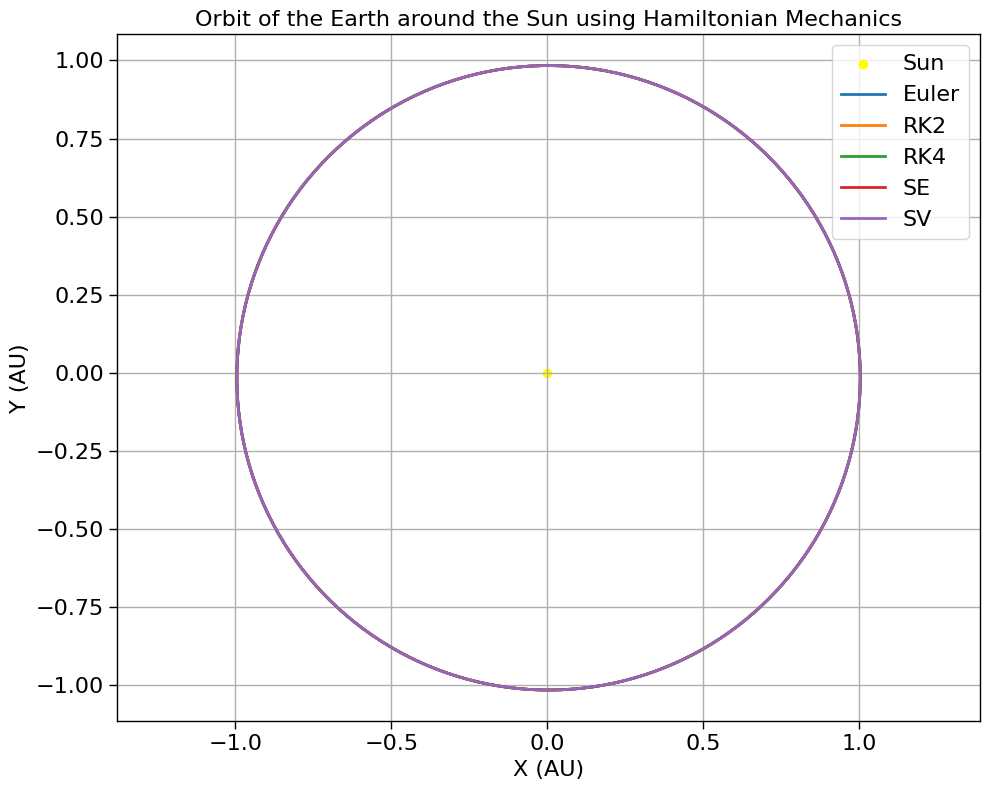

In [58]:
def dH_p(q, p):
    return p

def dH_q(q, p):
    G = 2.959159*10**(-4)  # in units of AU^3 solar mass and earth days
    M = 1    # in unit of Solar Mass
    r = np.linalg.norm(q)
    return G * M / r**3 * q

# Constants
t_0 = 0.0
q_0 = np.array([-5.34743068e-01 , 8.26293951e-01, -3.61541763e-05])
p_0 = np.array([-1.47187017e-02 ,-9.41540742e-03 ,-8.67603060e-08]) 
h = 1 # 1 earth day per step
N = 365  # total steps
methods = ["Euler", "RK2", "RK4", "SE", "SV"]

plt.figure(figsize=(10, 8))
plt.scatter([0], [0], color='yellow', label='Sun') 

for method in methods:
    T, Q, P = hamiltonian_solve(dH_q, dH_p, d=3, t_0=t_0, q_0=q_0, p_0=p_0, h=h, N=N, method="SV")
    plt.plot(Q[:, 0], Q[:, 1], label=f"{method}")

plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.title('Orbit of the Earth around the Sun using Hamiltonian Mechanics')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()
